Objetivo do Negócio:

1 - Determinar se a máquina irá falhar
2 - Determinar qual o tipo de falha

In [67]:
## Bibliotecas para tratamento dos dados
import numpy as np
import pandas as pd

## Bibliotecas para plot de gráficos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Bibliotecas ML

In [49]:
df = pd.read_csv(r'C:\Users\eng.fitness69\Documents\predictive_maintenance\predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [71]:
## Verificando tipo de dados e dados faltantes/nulos
df.info()
# Verificar se há linhas duplicadas
tem_duplicatas = df.duplicated().any()

if tem_duplicatas:
    print("Existem linhas duplicadas no DataFrame.")
else:
    print("Não há linhas duplicadas no DataFrame.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   Product_ID           10000 non-null  int64  
 2   Type                 10000 non-null  object 
 3   Air_temperature      10000 non-null  float64
 4   Process_temperature  10000 non-null  float64
 5   Rotational_speed     10000 non-null  float64
 6   Torque               10000 non-null  float64
 7   Tool_wear            10000 non-null  float64
 8   Target               10000 non-null  int64  
 9   Failure_type         10000 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 781.4+ KB
Não há linhas duplicadas no DataFrame.


Variáveis categóricas: Type, Failure_Type, Target
Variáveis numéricas: Air_temperature, Process_temperature, Rotational_speed, Torque e Tool_wear

In [51]:
## Analisando os dado
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [52]:
## renomeando colunas

rename_columns = {
    
    'UDI':'ID',
    'Air temperature [K]': 'Air_temperature',
    'Process temperature [K]' : 'Process_temperature',
    'Rotational speed [rpm]' : 'Rotational_speed',
    'Torque [Nm]' : 'Torque',
    'Tool wear [min]' : 'Tool_wear',
    'Product ID' : 'Product_ID',
    'Failure Type': 'Failure_type'    
}

df.rename(rename_columns, axis = 1, inplace = True)

In [53]:
## Ajustando a coluna "Product_ID"
df['Product_ID'] = df['Product_ID'].str[1:]

In [54]:
df['Rotational_speed'] = df['Rotational_speed'].astype('float')
df['Tool_wear'] = df['Tool_wear'].astype('float')


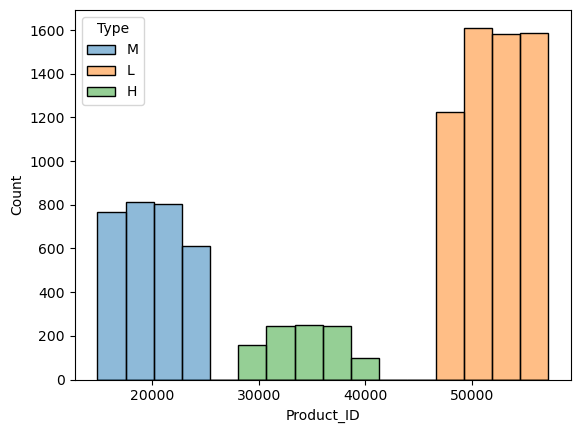

In [59]:
df['Product_ID'] = pd.to_numeric(df['Product_ID'])

# Histogram of ProductID
sns.histplot(data=df, x='Product_ID', hue='Type')
plt.show()

In [121]:
## ambas as colunas de id's não me agregam valor, logo devo exclui-las

drop_columns = ['Product_ID', 'ID']
df = df.drop(drop_columns, axis = 1)

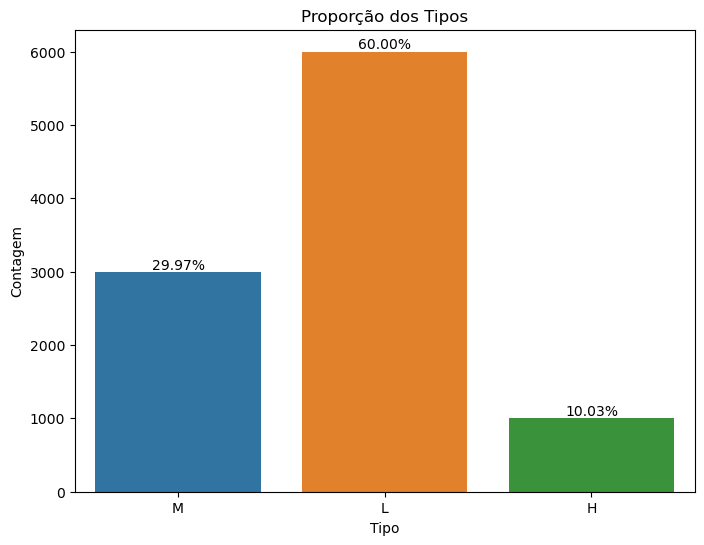

In [69]:
# Contagem dos tipos
tipo_contagem = df['Type'].value_counts()

# Plot do gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Type')
plt.title('Proporção dos Tipos')
plt.xlabel('Tipo')
plt.ylabel('Contagem')


# Adicionar as porcentagens como rótulos
total = len(df['Type'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()

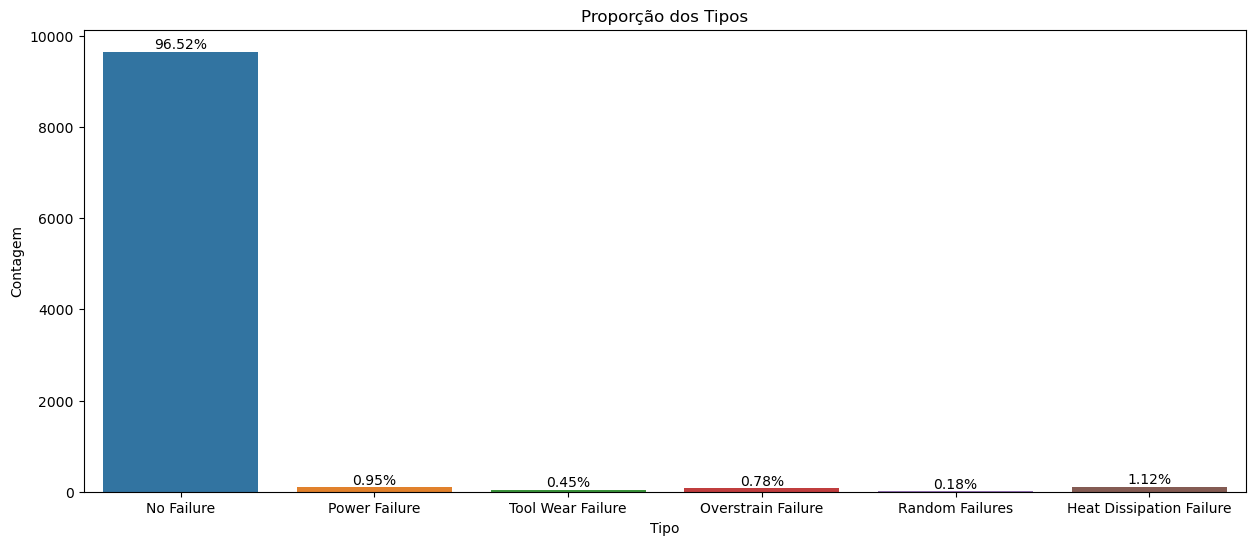

In [73]:
# Contagem dos tipos
tipo_contagem = df['Failure_type'].value_counts()

# Plot do gráfico de barras
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df, x='Failure_type')
plt.title('Proporção dos Tipos')
plt.xlabel('Tipo')
plt.ylabel('Contagem')

ax = sns.countplot(data=df, x = 'Failure_type')

# Adicionar as porcentagens como rótulos
total = len(df['Failure_type'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()

In [82]:
# Contagem de falhas na coluna 'Target'
count_failures = (df['Target'] == 1).sum()
print('Número de falhas:', count_failures)

# Soma das ocorrências de 'Failure_type' diferentes de 'No Failure'
sum_failures = df.loc[(df['Failure_type'] != 'No Failure') & (df['Target'] == 1), 'Failure_type'].count()
print('Soma das falhas de tipo diferente de "No Failure":', sum_failures)


Número de falhas: 339
Soma das falhas de tipo diferente de "No Failure": 330


In [83]:
## 9 dados são ambiguos, é necessário remove-los

# Filtrar as linhas que possuem 1 na coluna 'Target' e 'No Failure' na coluna 'Failure_type'
rows_to_remove = df[(df['Target'] == 1) & (df['Failure_type'] == 'No Failure')]

# Remover as linhas filtradas do DataFrame
df.drop(rows_to_remove.index, inplace=True)


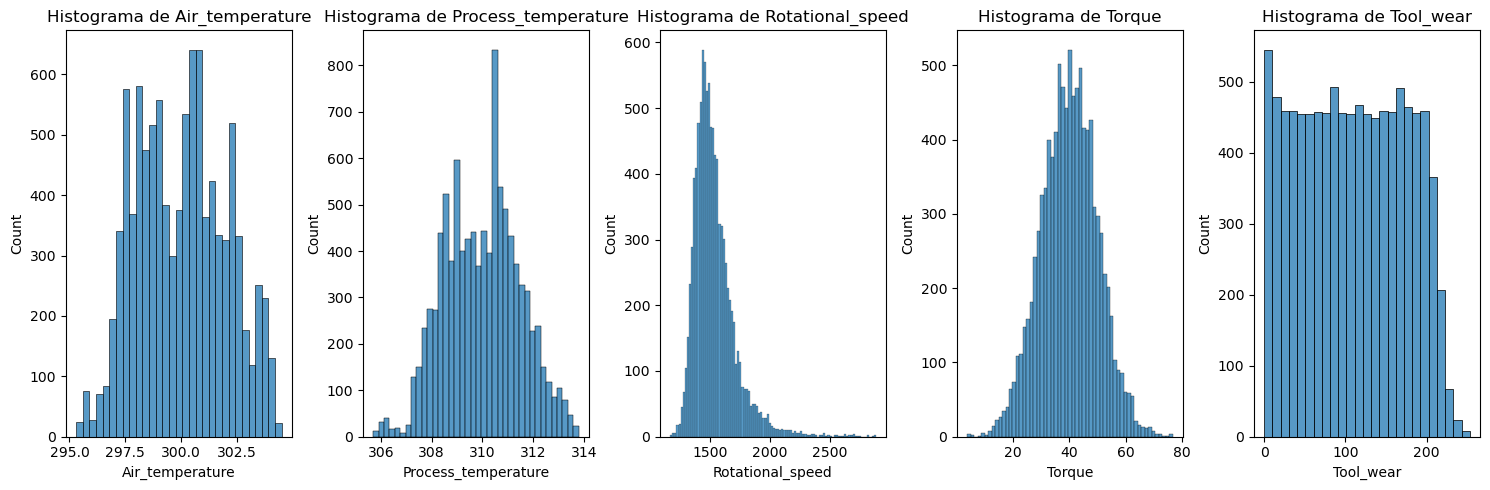

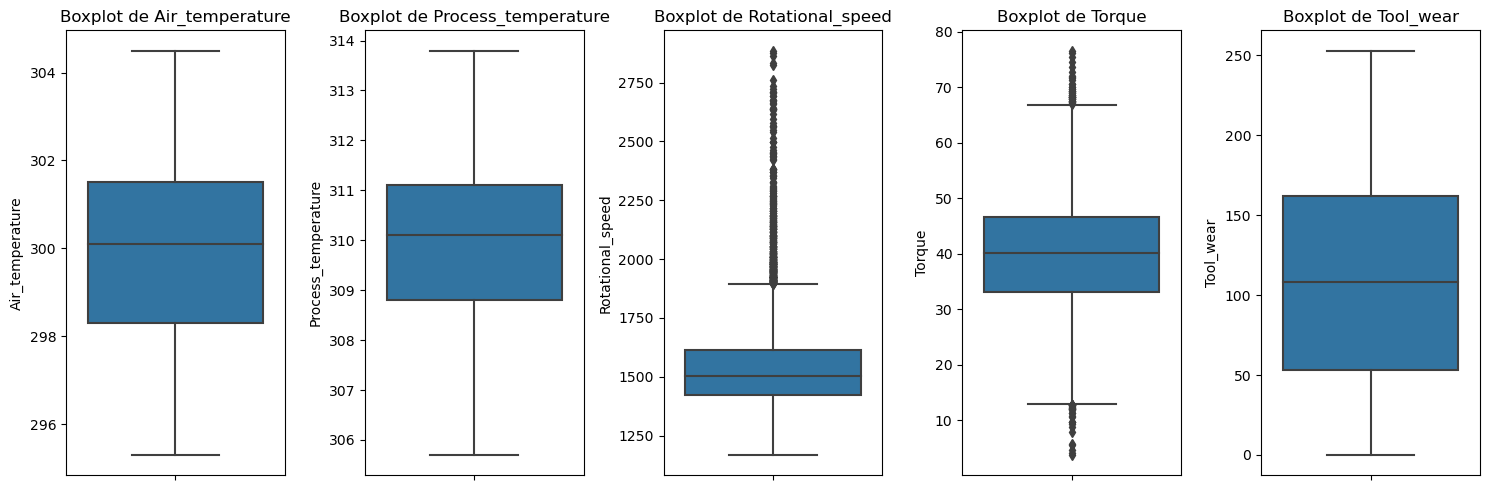

In [86]:
numerics_features = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']

# Criar figura e eixos para os histogramas
fig, axes = plt.subplots(nrows=1, ncols=len(numerics_features), figsize=(15, 5))

# Plotar histogramas lado a lado
for i, feature in enumerate(numerics_features):
    sns.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Histograma de {feature}')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os histogramas
plt.show()

# Criar figura e eixos para os boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerics_features), figsize=(15, 5))

# Plotar boxplots lado a lado
for i, feature in enumerate(numerics_features):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot de {feature}')

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os boxplots
plt.show()



É possível ver que existem outliers na coluna Rotational_speed e Torque. Como pode ser uma falha grave da máquina não podemos excluí-los ainda, será necessário análise futura.

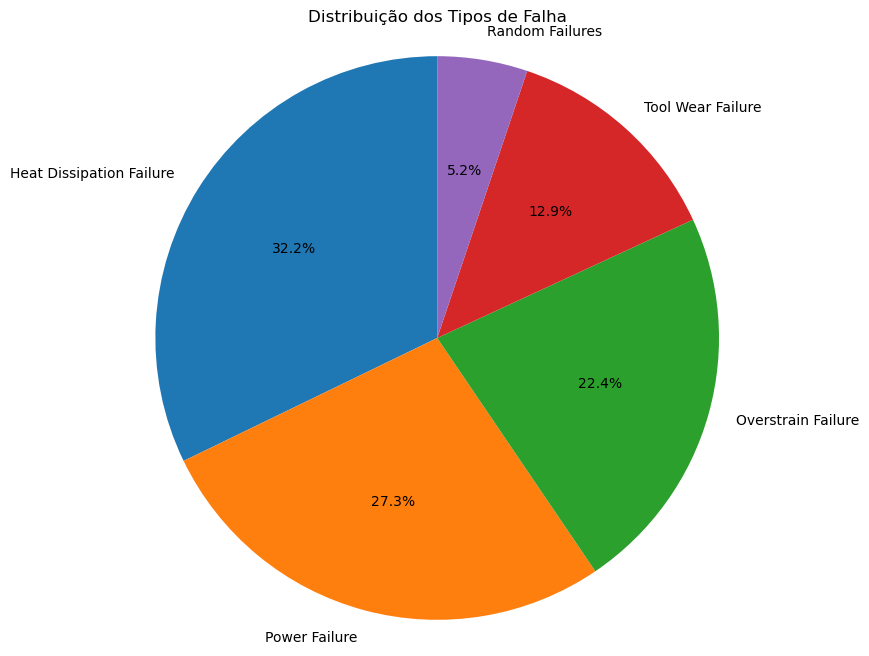

In [115]:
# Contagem dos valores na coluna 'Failure_type'
failure_counts = df_failures['Failure_type'].value_counts()

# Preparação dos dados para o gráfico de pizza
labels = failure_counts.index
sizes = failure_counts.values

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Ajustar o aspecto para um círculo
plt.axis('equal')

# Adicionar título ao gráfico
plt.title('Distribuição dos Tipos de Falha')

# Exibir o gráfico
plt.show()
